In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#from google.colab.patches import cv2_imshow

#Q1

Q1_Part1

In [2]:
def equalization(image):
    '''
    you can use libraries
    input(s):
    image (ndarray): input image
    output(s):
    image (ndarray): improved image
    '''
    #your code here
    image_out = image.copy()
    # check that the image is gray or rgb
    if(len(image_out.shape) == 3):
        # rgb image
        
        #convert to HSV
        HSV_img = cv2.cvtColor(image_out,cv2.COLOR_BGR2HSV)
        HSV_img[:,:,2] = cv2.equalizeHist(HSV_img[:,:,2])
        image_out = cv2.cvtColor(HSV_img,cv2.COLOR_HSV2BGR)
    else:
        # gray scale image
        image_out = cv2.equalizeHist(image_out)
    return image_out

In [18]:
gry_img = cv2.imread('gray.png',0)
rgb_img = cv2.imread('color.png')
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

In [8]:
tmp = equalization(rgb_img)

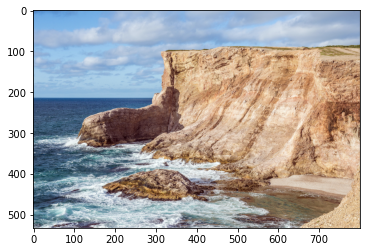

In [9]:
plt.imshow(rgb_img)

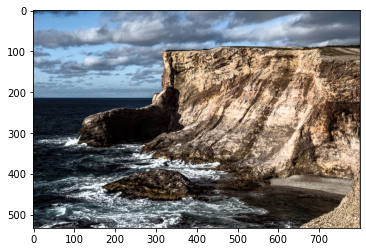

In [10]:
plt.imshow(tmp)

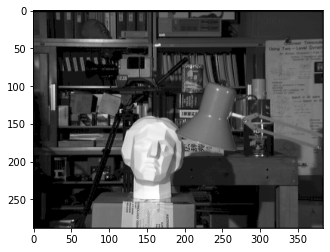

In [11]:
tmp = equalization(gry_img)
plt.imshow(gry_img,cmap='gray')

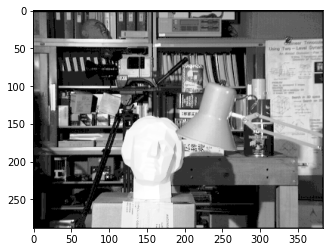

In [12]:
plt.imshow(tmp,cmap='gray')

Q1_Part2

In [13]:
def ACE(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    input(s):
    image (ndarray): input image
    output(s):
    image (ndarray): improved image
    '''
    #your code here
    
    image_out = image.copy()
    
    image_height= image.shape[0]
    image_width = image.shape[1]
    grid_height = int(image_height / gridSize[0])
    grid_width  = int(image_width / gridSize[1])
    
    for i in range(gridSize[0]):
        for j in range(gridSize[1]):
            single_grid = image[i*grid_height:((i+1)*grid_height) , j*grid_width:((j+1)*grid_width)]
            image_out[i*grid_height:((i+1)*grid_height) , j*grid_width:((j+1)*grid_width)] = equalization(single_grid)
    
    return image_out 

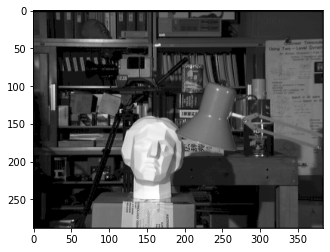

In [14]:
image = cv2.imread('gray.png',0)
plt.imshow(image,cmap='gray')

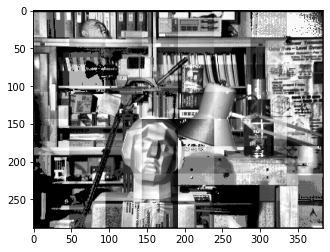

In [15]:
plt.imshow(ACE(image, (8,8)),cmap='gray')

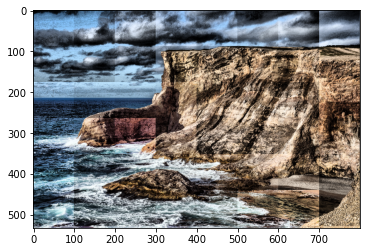

In [19]:
plt.imshow(ACE(rgb_img, (6,8)))

Q1_Part3

In [27]:
def CLAHE(image, gridSize, cropThreshold):
    '''
    you can just use the equalize function of OpenCV for each grid
    input(s):
    image (ndarray): input image
    output(s):
    image (ndarray): improved image
    '''
    #your code here
    image_out = image.copy()
    clahe = cv2.createCLAHE(clipLimit =cropThreshold, tileGridSize=gridSize)
    
    if(len(image_out.shape) == 3):
        # rgb image
        
        #convert to HSV
        HSV_img = cv2.cvtColor(image_out,cv2.COLOR_BGR2HSV)
        HSV_img[:,:,2] = clahe.apply(HSV_img[:,:,2])
        image_out = cv2.cvtColor(HSV_img,cv2.COLOR_HSV2BGR)
    else:
        # gray scale image
        image_out = clahe.apply(image)
    
    return image_out

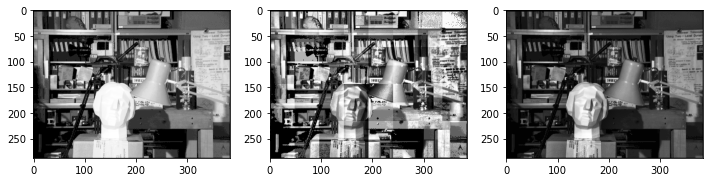

In [29]:
image = cv2.imread('gray.png',0)
fig = plt.figure(figsize=(12, 12))
result_equalization = equalization(image)
fig.add_subplot(1, 3, 1)
plt.imshow(result_equalization,cmap='gray')
result_ACE = ACE(image, (8,8))
fig.add_subplot(1, 3, 2)
plt.imshow(result_ACE,cmap='gray')
result_CLAHE = CLAHE(image, (8,8), 2.0)
fig.add_subplot(1, 3, 3)
plt.imshow(result_CLAHE,cmap='gray')

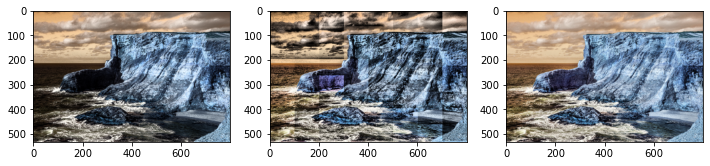

In [31]:
image = cv2.imread('color.png')
fig = plt.figure(figsize=(12, 12))
result_equalize = equalization(image)
fig.add_subplot(1, 3, 1)
plt.imshow(result_equalize)
result_ACE = ACE(image, (8,8))
fig.add_subplot(1, 3, 2)
plt.imshow(result_ACE)
result_CLAHE = CLAHE(image, (8,8), 2.0)
fig.add_subplot(1, 3, 3)
plt.imshow(result_CLAHE)

In [34]:
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel , np.sum(kernel)

In [35]:
kern,summ = gkern(l=3,sig=1.0)

In [36]:
print(kern,summ)

[[0.36787944 0.60653066 0.36787944]
 [0.60653066 1.         0.60653066]
 [0.36787944 0.60653066 0.36787944]] 4.897640403536304


# Q3

Q3_Part1

In [145]:
def convolve(image,kernel):
    # reflect padding using numpy
    image_padded = np.pad(image,1,'reflect')
    
    out = image_padded.copy()
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            out[y, x] = (kernel * image_padded[y:y + 3, x:x + 3]).sum()
            
    return out

In [86]:
image = cv2.imread('color.png',0)
print(image.shape)

(533, 800)


In [91]:
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
print(kernel)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [92]:
filtered_image = convolve(image,kernel)

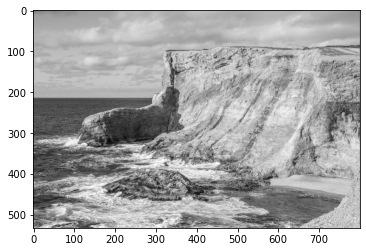

In [89]:
plt.imshow(image,cmap='gray')

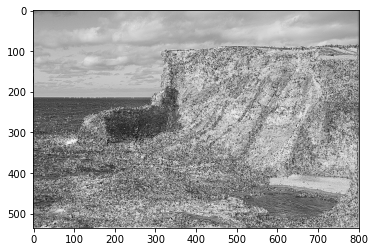

In [93]:
plt.imshow(filtered_image,'gray')

Q3_Part2

In [106]:
def Gaussian(kernel_size,sigma):
    #default mean
    mu = 0.0
    
    x, y = np.meshgrid(np.linspace(-1,1,kernel_size[0]), np.linspace(-1,1,kernel_size[1]))

    d = np.sqrt(x*x+y*y)
    
    g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
    
    return g

In [100]:
np.linspace(-1,1,10)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [111]:
Gaussian((3,3),1)

array([[0.36787944, 0.60653066, 0.36787944],
       [0.60653066, 1.        , 0.60653066],
       [0.36787944, 0.60653066, 0.36787944]])

Q3_Part3

In [125]:
def median(image,kernel_size):
    
    temp = []
    indexer = kernel_size // 2
    
    image_height = len(image)
    image_width  = len(image[0])
    
    image_out = np.zeros((image_height,image_width))
    
    
    for i in range(image_height):

        for j in range(image_width):

            for z in range(kernel_size):
                
                if (i + z - indexer < 0 or i + z - indexer > image_height - 1):
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if (j + z - indexer < 0 or j + indexer > image_width - 1):
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(image[i + z - indexer][j + k - indexer])

            temp.sort()
            image_out[i][j] = temp[len(temp) // 2]
            temp = []
    return image_out

In [129]:
med = median(image,9)

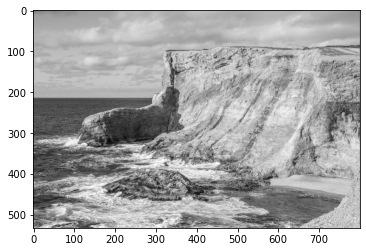

In [127]:
plt.imshow(image,'gray')

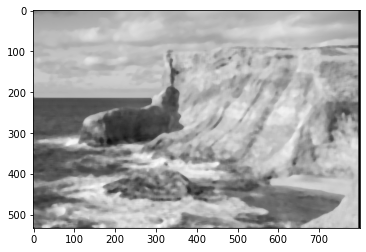

In [130]:
plt.imshow(med,'gray')

Q3_Part4

In [134]:
image = cv2.imread('gaussian.png',0)

In [135]:
image.shape

(165, 216)

In [191]:
kernel = Gaussian((3,3),0.15)
print(kernel)

[[4.98910939e-20 2.23363144e-10 4.98910939e-20]
 [2.23363144e-10 1.00000000e+00 2.23363144e-10]
 [4.98910939e-20 2.23363144e-10 4.98910939e-20]]


In [192]:
filtered_image = convolve(image,kernel)

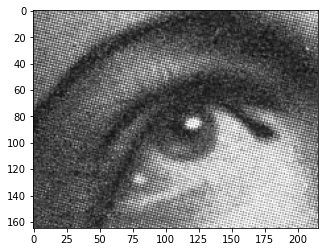

In [180]:
plt.imshow(image,cmap='gray')

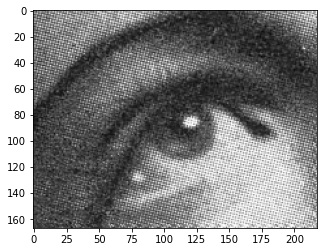

In [193]:
plt.imshow(filtered_image,cmap='gray')

Q3_Part5

In [194]:
image = cv2.imread('median.bmp',0)

In [195]:
image.shape

(248, 441)

In [203]:
filtered_image = median(image,3)

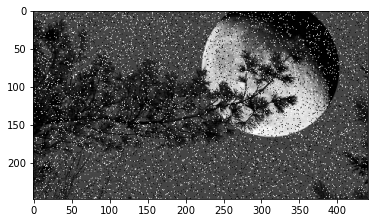

In [196]:
plt.imshow(image,cmap='gray')

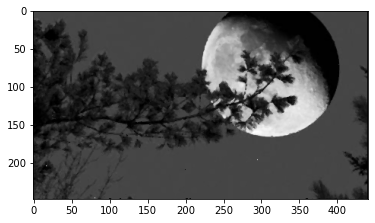

In [204]:
plt.imshow(filtered_image,cmap='gray')

Q3_Part6

In [205]:
image = cv2.imread('sharp.png',0)

In [206]:
image.shape

(169, 183)

In [215]:
kernel = [
    [-1,-1,-1],
    [-1,9,-1],
    [-1,-1,-1]
]

In [216]:
filtered_image = convolve(image,kernel)

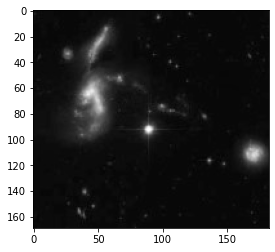

In [217]:
plt.imshow(image,cmap='gray')

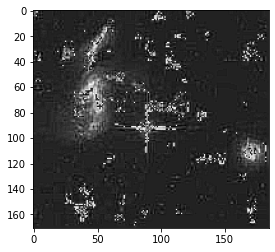

In [218]:
plt.imshow(filtered_image,cmap='gray')